In [1]:
# Testing Regression Models

In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import pandas as pd
import ta
import matplotlib.dates as mdates
from sklearn.svm import SVR
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from datetime import datetime

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from src.visualization.visualize import DisplayTicker
from src.features.build_features import BuildFeatures


In [2]:
def convert_data(ticker, open_close):
    """
    convert Open/Close for prediction

    """
    stock_type = "Open"
    if open_close == 0:
        stock_type = "Close"

    ticker_copy = ticker.copy()
    print(ticker_copy['Date'].iloc[-1])
    ticker_copy['Date'] = ticker_copy['Date'].str.split('-').str[2]
    ticker_copy['Date'] = pd.to_numeric(ticker_copy['Date'])
    return [ticker_copy["Date"].tolist(), ticker_copy[stock_type].tolist()]


In [3]:
MSFT = pd.read_csv('./.data/MSFT.csv', index_col=['Date'], parse_dates=['Date'])
MSFT.sort_values('Date')
MSFT.reset_index(inplace=True)
DF_Train_Index = round(len(MSFT) * .75)
# Train Split 75%
DF_Train = MSFT[:DF_Train_Index]
# Test Split 25%
DF_Test = MSFT[DF_Train_Index:]
print(len(DF_Train))
print(len(DF_Test))
print("**************")
#print(DF_Train.info)
print("**************")
#print(DF_Test.info)
#len(MSFT)
dates_df = MSFT.copy()
dates_df = dates_df.reset_index()
org_dates = dates_df['Date']
print(dates_df)
print("-------------")
print(org_dates)

dates_df['Date'] = dates_df['Date'].map(mdates.date2num)
dates_df['Date']

2251
750
**************
**************
      index       Date        Open        High         Low       Close  \
0         0 2008-03-31   27.879999   28.590000   27.840000   28.379999   
1         1 2008-04-01   28.830000   29.540001   28.629999   29.500000   
2         2 2008-04-02   29.570000   29.580000   29.000000   29.160000   
3         3 2008-04-03   29.000000   29.320000   28.799999   29.000000   
4         4 2008-04-04   29.129999   29.260000   28.740000   29.160000   
...     ...        ...         ...         ...         ...         ...   
2996   2996 2020-02-24  167.770004  174.550003  163.229996  170.889999   
2997   2997 2020-02-25  174.199997  174.839996  167.649994  168.070007   
2998   2998 2020-02-26  169.710007  173.259995  168.210007  170.169998   
2999   2999 2020-02-27  163.320007  167.029999  157.979996  158.179993   
3000   3000 2020-02-28  152.410004  163.710007  152.000000  162.009995   

       Adj Close    Volume  
0      21.455233  46780600  
1      22.3019

0       733132.0
1       733133.0
2       733134.0
3       733135.0
4       733136.0
          ...   
2996    737479.0
2997    737480.0
2998    737481.0
2999    737482.0
3000    737483.0
Name: Date, Length: 3001, dtype: float64

In [4]:
print(len(org_dates[:len(DF_Train_dates)]))

NameError: name 'DF_Train_dates' is not defined

In [27]:
from sklearn.svm import SVR

# dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates = dates_df['Date'].values
print("Converted Dates Shape: {}".format(dates.shape))
print("First 10 converted data: {}".format(dates))

prices = MSFT['Close'].values
print(len(dates))
print("Prices Shape: {}".format(prices.shape))
#
# Train Split 75%
DF_train_prices = DF_Train['Close'].values
DF_train_dates = DF_Train['Date'].values
num_train_dates = dates[:DF_Train_Index]
print("Shape of train date: {}".format(num_train_dates.shape))
# Test Split 25%
DF_test_prices = DF_Test['Close'].values
DF_test_dates = DF_Test['Date'].values
num_test_dates = dates[DF_Train_Index:]
print("Shape of test date: {}".format(num_test_dates.shape))
#DF_Test = MSFT[DF_Train_Index:]
# Train Split 75%
#DF_Train = MSFT[:DF_Train_Index]
# Test Split 25%
#DF_Test = MSFT[DF_Train_Index:]
# Converting to one dimension array
# Train Data
train_dates = np.reshape(num_train_dates, (len(DF_train_dates), 1))
train_prices = np.reshape(DF_train_prices, (len(DF_train_prices), 1))
# Test Data
test_dates = np.reshape(num_test_dates, (len(DF_test_dates), 1))
test_prices = np.reshape(DF_test_prices, (len(DF_test_prices), 1))

# Print
#print("test_dates: {}", test_dates)
#print("test_prices: {}", test_prices)

# Checking the length
#print("Length of Dates: {}".format(len(train_dates)))
#prices.shape
#print("type_of_dates: {}".format(type(train_dates)))
#print("type_of_price: {}".format(type(train_prices)))

# Fit training data using SVR/RBF
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(train_dates, train_prices)

#print information level
print("******dates*******")
print(train_dates[:10])
print(test_dates[:10])
print("******dates*******")
# Get predicted Data from Training Data
print("############Predicting Phase##########")
train_predicted = svr_rbf.predict(train_dates)
test_predicted = svr_rbf.predict(test_dates)
print("First 10 predicted: {}".format(test_predicted[:10]))
print("First 10 actual: {}".format(test_prices[:10]))
print("First 10  dates: {}".format(test_dates[:10]))
print("Predicted Train Shape: {}".format(train_predicted.shape))
print("Predicted Test Shape: {}".format(test_predicted.shape))
print(svr_rbf.predict(np.array[736397]))
print(svr_rbf.predict(np.array[736401]))
print(svr_rbf.predict(np.array[736409]))
print("############Predicting Phase##########")
#print("Train Predicted Data: {}".format(train_predicted))
#print("Test Predicted Data: {}".format(test_predicted))
#print(predicted[:10])

# Plot Training Data vs Predicted Price Data
plt.figure(figsize = (12,6))
plt.plot(org_dates[:len(DF_train_dates)], train_prices, color= 'black', label= 'Train Data')
plt.plot(org_dates[:len(DF_train_dates)], train_predicted, color= 'red', label= 'RBF model')

#plt.plot(org_dates[:len(DF_Train_dates)], svr_rbf.predict(dates), color= 'red', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Converted Dates Shape: (3001,)
First 10 converted data: [733132. 733133. 733134. ... 737481. 737482. 737483.]
3001
Prices Shape: (3001,)
Shape of train date: (2251,)
Shape of test date: (750,)
******dates*******
[[733132.]
 [733133.]
 [733134.]
 [733135.]
 [733136.]
 [733139.]
 [733140.]
 [733141.]
 [733142.]
 [733143.]]
[[736396.]
 [736397.]
 [736398.]
 [736401.]
 [736402.]
 [736403.]
 [736404.]
 [736405.]
 [736408.]
 [736409.]]
******dates*******
############Predicting Phase##########
First 10 predicted: [62.82965802 58.16467195 50.98180137 36.52438343 35.51625972 35.20143775
 35.12343462 35.10797381 35.10515735 35.10515454]
First 10 actual: [[64.989998]
 [64.730003]
 [64.93    ]
 [64.709999]
 [64.410004]
 [64.75    ]
 [64.639999]
 [64.870003]
 [64.93    ]
 [64.209999]]
First 10  dates: [[736396.]
 [736397.]
 [736398.]
 [736401.]
 [736402.]
 [736403.]
 [736404.]
 [736405.]
 [736408.]
 [736409.]]
Predicted Train Shape: (2251,)
Predicted Test Shape: (750,)


TypeError: 'builtin_function_or_method' object is not subscriptable

In [51]:
print(train_predicted[10:])
print(test_predicted[:10])
#print(svr_rbf.predict(np.asarray[736401]))
#print(svr_rbf.predict(np.asarray[736409]))

[27.96011876 28.35034887 28.84982474 ... 64.14988484 64.37009114
 64.30035773]
[62.82965802 58.16467195 50.98180137 36.52438343 35.51625972 35.20143775
 35.12343462 35.10797381 35.10515735 35.10515454]


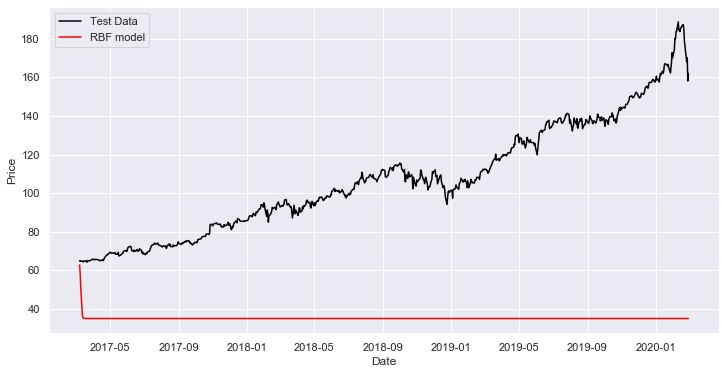

In [43]:
# Plot Training Data vs Predicted Price Data
plt.figure(figsize = (12,6))
plt.plot(org_dates[len(DF_train_dates):], test_prices, color= 'black', label= 'Test Data')
plt.plot(org_dates[len(DF_train_dates):], test_predicted, color= 'red', label= 'RBF model')

#plt.plot(org_dates[:len(DF_Train_dates)], svr_rbf.predict(dates), color= 'red', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
print("hello")

hello


In [8]:
MSFT
MSFT_A = DisplayTicker(MSFT, "Microsoft")
#MSFT_A.graph_stock()

In [7]:
indicator_bb = ta.volatility.BollingerBands(close=MSFT["Close"], n=20, ndev=2)
indicator_SMA20 = ta.trend.SMAIndicator(close=MSFT["Close"],n=20, fillna=True)
MSFT['SMA_20'] = indicator_SMA20.sma_indicator()
MSFT['bb_bbm'] = indicator_bb.bollinger_mavg()
MSFT['bb_bbh'] = indicator_bb.bollinger_hband()
MSFT['bb_bbl'] = indicator_bb.bollinger_lband()
# Add Bollinger Band high indicator
#MSFT['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
#MSFT['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

In [4]:
MSFT


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,bb_bbm,bb_bbh,bb_bbl
0,2008-03-31,27.879999,28.590000,27.840000,28.379999,21.455233,46780600,28.379999,28.379999,28.379999,28.379999
1,2008-04-01,28.830000,29.540001,28.629999,29.500000,22.301943,65796200,28.939999,28.939999,30.060001,27.819998
2,2008-04-02,29.570000,29.580000,29.000000,29.160000,22.044899,49499400,29.013333,29.013333,29.951038,28.075628
3,2008-04-03,29.000000,29.320000,28.799999,29.000000,21.923944,38961400,29.010000,29.010000,29.822158,28.197841
4,2008-04-04,29.129999,29.260000,28.740000,29.160000,22.044899,43860800,29.040000,29.040000,29.776261,28.303738
...,...,...,...,...,...,...,...,...,...,...,...
2996,2020-02-24,167.770004,174.550003,163.229996,170.889999,170.889999,68311100,178.801500,178.801500,194.402686,163.200314
2997,2020-02-25,174.199997,174.839996,167.649994,168.070007,168.070007,68073300,179.091000,179.091000,193.634134,164.547866
2998,2020-02-26,169.710007,173.259995,168.210007,170.169998,170.169998,56206100,179.326500,179.326500,193.111890,165.541110
2999,2020-02-27,163.320007,167.029999,157.979996,158.179993,158.179993,93174900,178.833500,178.833500,194.740186,162.926813
